# SocialMideaConduct 2 社交媒体数据-切割+聚类模块

## 2.0 预制模块

In [1]:
import pandas as pd
import numpy as np

## 2.1 社交媒体数据切割技术

### 原始的10w+量数据集说明
module: dataSpilt

In [2]:
import dataSplit
data = pd.read_csv("results/random-nuclear/Res-Dat/processed-content-data.csv")
data

,author,content,time
0,Alexliao-Taiwan,希望你平安Greenbrothers现在十分担心福岛核电站的核泄漏最糟糕的情况核泄漏会波及到...,2011年03月13日 23:38
1,成都商报,聚焦日本地震据日本新闻网报道美国原子能委员会和美国能源部的一个专家小组今13日夜启程赶来日本...,2011年03月13日 23:29
2,东山讲坛,东京日本地震海啸爆炸中新网3月13日电据日本新闻网报道美国原子能委员会和美国能源部的一个专家...,2011年03月13日 23:21
3,长江日报,凤凰李淼福岛核泄漏日政府最初非常谨慎公布信息很少国民一度非常紧张原子能保安院官员记者会也都是...,2011年03月13日 23:11
4,酿青椒,福岛第一第二核电所属的东京电力社长出来向公众谢罪说跟设备老化比起来海啸才是使机械失效引发事故...,2011年03月13日 23:04
5,完美仙剑217,哎日本这次核泄漏火山爆发海啸哎可怜的日本不知道这次是宫城县和福岛县的城市都遭了还是只是城市旁...,2011年03月13日 23:01
6,梓蒙2011,凤凰李淼福岛3号核电站随时可能爆炸不过不是核反应堆爆炸但即使同1号一样是氢气爆炸也不能否定空...,2011年03月13日 22:56
7,梓蒙2011,凤凰李淼福岛核泄漏日本政府最初调查非常谨慎公布的信息很少国民一度非常紧张原子能保安院官员记者...,2011年03月13日 22:52
8,微速报,美国原子能委员会和美国能源部专家小组13日晚启程赶赴日本将协助日本政府处理福岛核电站的核泄漏...,2011年03月13日 22:50
9,Pug先生,日本核泄漏都慌妈逼啊还记得1945年美国干了什么吗美国佬给小日本丢了两颗原子弹原子弹啊那可是...,2011年03月17日 23:41


In [3]:
dataSplit.dataRandom("results/random-nuclear/Res-Dat/processed-content-data.csv", "results/random-nuclear/Res-Random-Data/allnuclearRandom.csv")

In [4]:
dataSplit.splitByLineCount("results/random-nuclear/Res-Random-Data/allnuclearRandom.csv", 50460)  #切割2份

make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_1.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_2.csv


可以看到随机生成了10个csv格式的子文件，我们可以尝试对这些子文件进行后续的操作，比如聚类等等算法，
避免因为数据量太大导致降维超出内存等的问题。

接下来我们可以实现遍历csv进行相关的降维等等操作了

我们定义一个列表放置所有的生成文件

## 2.2 评论类数据降维考察

相关内容封装在nlp_dimensioner模块里面了，降维包里面有包括PCA降维等等技术，不过需要我们先生成相关的词频矩阵才行

In [5]:
lister = []
for i in range(2):
    lister.append("allnuclearRandom_"+str(i+1)+".csv")

lister

['allnuclearRandom_1.csv', 'allnuclearRandom_2.csv']

In [17]:
data = pd.read_csv("results/random-nuclear/Res-Random-Data/allnuclearRandom_1.csv")

In [7]:
!pip install jieba

    100% |████████████████████████████████| 19.2MB 103.9MB/s ta 0:00:01�███████████████▉    | 16.7MB 94.8MB/s eta 0:00:01
  Running setup.py bdist_wheel for jieba ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/29/72/9d/67d9d91a5a2c93b166e268e285f33ea60acec18578af4be0a3
Successfully built jieba
You are using pip version 9.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
import jieba
def tokenizer(sentense):
    words = []
    cut = jieba.cut(sentense)
    for word in cut:
        words.append(word)
    return words

from sklearn.feature_extraction.text import CountVectorizer
stopwords = [] #去停用词列表
for stopword in open('stopwords/baidu_stopwords.txt', 'r', encoding='utf-8'):
    stopwords.append(stopword.strip())
count = CountVectorizer(tokenizer=tokenizer, stop_words=list(stopwords))
countvector = count.fit_transform(data['content']).toarray()
countvector

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.027 seconds.
Prefix dict has been built successfully.
/home/ma-user/anaconda3/envs/XGBoost-Sklearn/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  sorted(inconsistent))


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
from nlp_dimensioner import PCA
pca_data = PCA.PCAController(data,countvector)
X_pca_frame = pca_data.pca_3()
X_pca_frame

,pca_1,pca_2,pca_3
0,-1.747166,0.231692,0.160927
1,1.904189,-0.145276,-2.604280
2,-1.737551,0.227662,0.202554
3,-1.805067,0.160222,0.059337
4,-0.677071,0.291587,-0.338471
5,-0.305817,-0.635328,-0.139995
6,-0.469321,-0.493484,-0.053521
7,-1.108708,-0.199283,0.702444
8,0.469513,0.369755,-0.634668
9,-0.545956,-0.570841,1.414741


In [19]:
X_pca_frame.to_csv("PCA-03.csv", index=False)

In [20]:
X_pca_frame = pd.read_csv("PCA-03.csv")
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,-1.747166,0.231692,0.160927
1,1.904189,-0.145276,-2.604280
2,-1.737551,0.227662,0.202554
3,-1.805067,0.160222,0.059337
4,-0.677071,0.291587,-0.338471


轮廓系数可以用来选择合适的聚类数目。根据折线图可直观的找到系数变化幅度最大的点，认为发生畸变幅度最大的点就是最好的聚类数目。
上图显示，聚类成3类到4类的时候效果最优。


Successfully upload file results/random-nuclear/Res-Picture/1-elbow-KMEANS-cluster.png to OBS askiksa/askiksa/SocialMidea


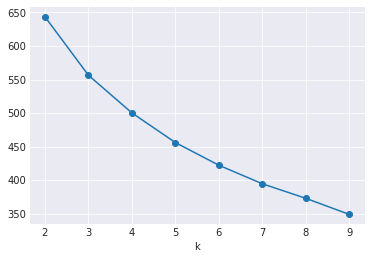

In [21]:
from dataclustertools import kmeanscluster
d = kmeanscluster.KMeansController(data, X_pca_frame)
d.elbow_cluster_comment('results/random-nuclear/Res-Picture/', "1")
# 肘部法

from modelarts.session import Session
session = Session(access_key='UECX4HJL9FUQ4BPCALWI',
                  secret_key='7POiCauKvUm5Nsis2H5Kizu8B73XYRijyeoO2nlh',
                  project_id='	0b9f5a5c1d00f5e50f5ec01dbf9f9e20',
                  region_name='cn-north-4')
session.upload_data(bucket_path=OBS_BASE_PATH + '/askiksa/SocialMidea/', path='results/random-nuclear/Res-Picture/1-elbow-KMEANS-cluster.png')

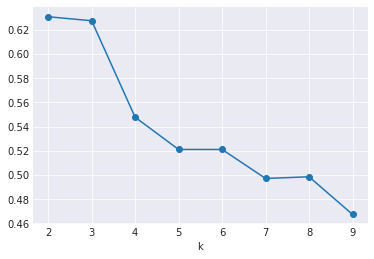

In [13]:
d.silhouette_cluster_comment('results/random-nuclear/Res-Picture/', "1")

#轮廓系数法

In [14]:
BUCKET_NAME = 'askiksa'
UNIQUE_ID = '34520182201779'
OBS_BASE_PATH = BUCKET_NAME

In [22]:
# Calinski-Harabasz
d.calinski_Harabaz_comment()

ImportError: cannot import name 'calinski_harabasz_score'

In [22]:
# for i in range(2,10):
#     d.cluster_KMeans(i)
#     ## 注意：这边要定标签！
#     d.show_scatter_result()
y=d.cluster_KMeans(3)
y

,author,content,time,cluster
0,desperadowho,看多了核平的光污染艾欧泽亚我眼睛都要瞎了,2019-09-17 17:17,0
1,蓝田坝日暖玉生烟,受台风海贝思袭扰日本福岛55袋核污染物被水冲走因海贝思带来的暴雨造成福岛的部分核废弃物临时保...,2019-10-19 18:57,2
2,知乎用户 (作者),两害取其轻为什么要取其轻你这句话说的很对请开始你的表演你的意思就是把南海和台湾拱手相让我懂你...,2017-02-15,0
3,啷个哩个啷,核弹太多了维护太费钱了我觉得我们需要把二次打击做好就能够保持威慑了像俄罗斯核潜艇破冰上浮威慑...,04-14,0
4,一回首全是梦,日本新经产相视察福岛第一核电站O网页链接,2015年10月13日 22:40,0
5,果C_时光,日本政府拟将福岛核污水排入海中刚霍霍完毛里求斯这又来霍霍太平洋跟日本沾边的没有好事,2020-10-20 11:44,0
6,金牌娱乐八卦,和女朋友的消费观有很大差异纠结要不要继续走下去张桂梅校长反对当全职太太日本福岛核污水可能损害...,2020-10-26 22:44,0
7,二洁二洁小二洁,妈的世界毁灭吧日本早点倒核废水行不行,05月18日 20:28,0
8,地球天使EarthAngel,如果这个世界没有了我們会变成什麽样子呢日本福岛核灾事故发生虽然已经过了四年但核辐射污染问题依...,2015年10月14日 16:09,0
9,司马南人,豪叼友乌合麒麟任何世界性质的环保机构只要是对日本核废水不闻不问却跑来指责中国环保问题的都是打...,05月09日 11:56,0


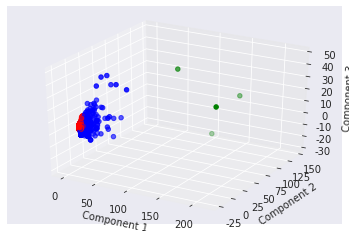

In [23]:
d.show_scatter_result()

In [40]:
def generate(n):
    a = pd.read_csv("cluster.csv")
    d = kmeanscluster.KMeansController(data, a)
#     print(d.calinski_Harabaz_comment())
    d.cluster_KMeans(n)
    d.show_scatter_result()

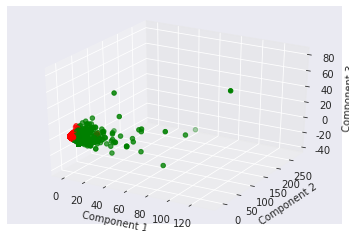

In [41]:
generate(2)

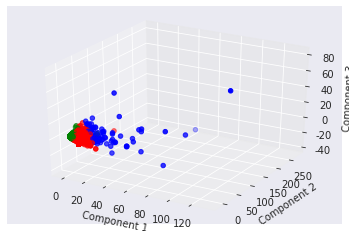

In [42]:
generate(3)

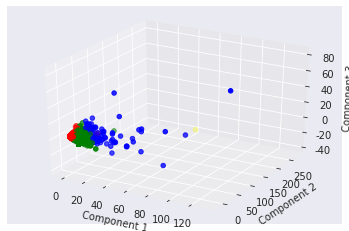

In [43]:
generate(4)

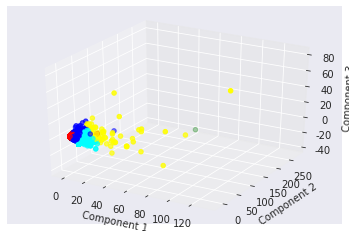

In [44]:
generate(5)

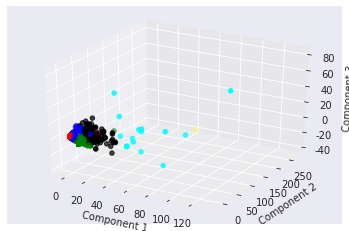

In [45]:
generate(6)

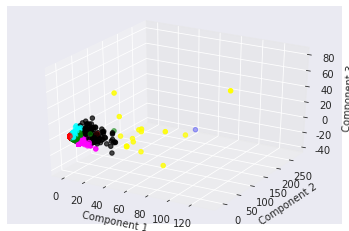

In [46]:
generate(7)

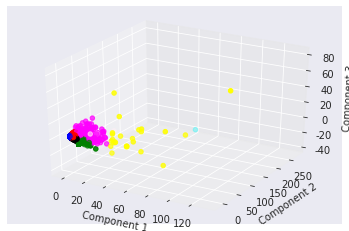

In [47]:
generate(8)

In [36]:
a = pd.read_csv("cluster.csv")
a

,pca_1,pca_2,pca_3
0,2.326591,-1.218333,1.775123
1,1.617744,-0.214898,-0.959827
2,1.755052,0.122708,-0.523890
3,-0.371499,0.001506,2.043105
4,0.757957,-0.885630,0.381754
5,5.922579,-0.629778,-1.119376
6,-1.825635,0.173556,-0.032954
7,-0.802734,0.092221,0.294488
8,-1.559675,0.243008,0.230907
9,-0.893756,0.356340,0.672241


In [1]:
generate(9)

NameError: name 'generate' is not defined

## 面向时间聚类

In [4]:
import dataSplit
data = pd.read_csv("results/random-nuclear/Res-Dat/timesorted-2021.csv")
data

,author,content,time
0,科技扒一扒,新闻看点前段时间日本内阁对外宣称由于福岛核电站存储的污水无处存他们召开内阁会议决定将这些核废...,2021-01-01 12:59:00
1,马关ty1895,男子持刀捅人被抓后仍大喊要杀人村民他是我们村支书任重而道远我爱你中国我国单身成年人口24亿人...,2021-01-02 10:15:00
2,愤怒的啄木鸟1996,鸟哥点评让中国核公知去给福岛民众科普一下让日本人民放心2011年发生的311东日本大地震及其...,2021-01-02 15:23:00
3,马关ty1895,致敬每一位不平凡的中国人我爱你中国我和我的祖国实干兴邦我们都是奋斗者只争朝夕不负韶华幸福都是...,2021-01-02 16:43:00
4,重修课本再来归,日本将核污水倒进海洋以后海产品慎吃海盐也不例外2扬州,2021-01-02 19:01:00
...,...,...,...
41601,Leon,明白了真特么缺德从古至今缺大德,2021-05-30 00:00:00
41602,佟秀华 (作者),311日本福岛海啸淹没核电站因没电缺水深夜23时后燃料棒熔融已经开始全部电源丧失后的10小时...,2021-05-30 00:00:00
41603,佟秀华 (作者),切尔诺贝利就是反应炉压力容器没有安全壳在很短的时间内爆炸炉体咋掉了13将厂房整个掀开状态比福...,2021-05-30 00:00:00
41604,金线小白龙,也许不是技术机密是库存机密,2021-05-30 00:00:00


In [5]:
dataSplit.dataRandom("results/random-nuclear/Res-Dat/timesorted-2021.csv", "results/random-nuclear/Res-Random-Data/allnuclearRandom.csv")

In [6]:
dataSplit.splitByLineCount("results/random-nuclear/Res-Random-Data/allnuclearRandom.csv", 8325)  #切割2份

make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_1.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_2.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_3.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_4.csv
make file: results/random-nuclear/Res-Random-Data/allnuclearRandom_5.csv


In [4]:
data = pd.read_csv("results/random-nuclear/Res-Random-Data/allnuclearRandom_2.csv")
data

,author,content,time
0,胡守之,抛开剂量谈危害,2021-04-13 00:00:00
1,非理性消费行为,2011年311大地震发生时南方系的报道对日本极尽阿谀吹捧之能事相信日本相信这个由东西文化精...,2021-03-11 14:29:00
2,李元生,福岛是本来能救回来的结果给人硬生生拖成的切尔诺贝利是炸掉的那一瞬间一切都完了但是苏联还是尽全...,2021-04-26 00:00:00
3,上海中公教育,中公早报每日时政2月28日星期日农历正月十七1嫦娥五号奋斗者号等入选2020年度中国科学十大...,2021-02-28 09:17:00
4,芝向远大-,TF家族你是不是真喝了小的核废水了棍家一直是无论什么都是第一名而你给我们第一名的待遇了吗我们...,2021-05-15 08:08:00
...,...,...,...
8320,邱汝泉,放射性元素上是原子级别的把水加热成蒸汽难道水分子就没有氚了吗点解分解成H2难道就没有氚了吗为...,2021-04-15 00:00:00
8321,SU_ICIDER,笑死人了日本倒核废水倒你家门口你怎么不喝呢老懂懂懂哥还不是女的出来卖嘛,2021-05-10 01:35:00
8322,365-厦门大雨,日本福岛县近海海域60级地震小日本你们是造孽啊日本可以地震为借口说核废水又泄漏了加大排放量吧,2021-05-14 10:41:00
8323,返朴,日本福岛核废水排海究竟有多大影响返朴2021414,2021-04-14 00:00:00


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.702 seconds.
Prefix dict has been built successfully.
F:\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


聚类2簇的calinski_harabasz分数为：8054.103329
聚类3簇的calinski_harabasz分数为：10205.699080
聚类4簇的calinski_harabasz分数为：14103.575483
聚类5簇的calinski_harabasz分数为：17452.269982
聚类6簇的calinski_harabasz分数为：21563.946270
聚类7簇的calinski_harabasz分数为：23198.831767
聚类8簇的calinski_harabasz分数为：24054.193286
聚类9簇的calinski_harabasz分数为：25273.027126


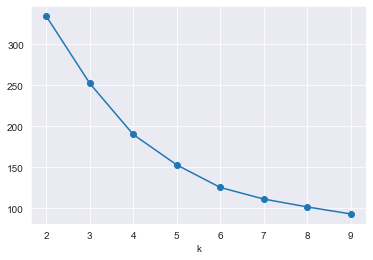

In [5]:
import jieba
def tokenizer(sentense):
    words = []
    cut = jieba.cut(sentense)
    for word in cut:
        words.append(word)
    return words

from sklearn.feature_extraction.text import CountVectorizer
stopwords = [] #去停用词列表
for stopword in open('stopwords/baidu_stopwords.txt', 'r', encoding='utf-8'):
    stopwords.append(stopword.strip())
count = CountVectorizer(tokenizer=tokenizer, stop_words=list(stopwords))
countvector = count.fit_transform(data['content']).toarray()
countvector


from nlp_dimensioner import PCA
pca_data = PCA.PCAController(data,countvector)
X_pca_frame = pca_data.pca_3()
X_pca_frame

from dataclustertools import kmeanscluster
d = kmeanscluster.KMeansController(data, X_pca_frame)
d.elbow_cluster_comment('results/random-nuclear/Res-Picture/', "2")



d.calinski_Harabaz_comment()

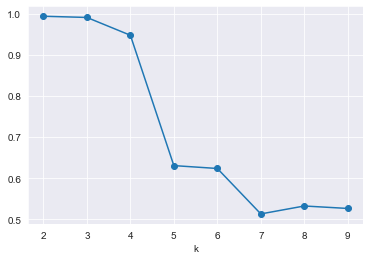

In [7]:
d.silhouette_cluster_comment('results/random-nuclear/Res-Picture/', "2")


In [8]:
# 2聚类  3聚类   5聚类  测试
# 2 聚类
y=d.cluster_KMeans(5)
y

,author,content,time,cluster
0,胡守之,抛开剂量谈危害,2021-04-13 00:00:00,2
1,非理性消费行为,2011年311大地震发生时南方系的报道对日本极尽阿谀吹捧之能事相信日本相信这个由东西文化精...,2021-03-11 14:29:00,0
2,李元生,福岛是本来能救回来的结果给人硬生生拖成的切尔诺贝利是炸掉的那一瞬间一切都完了但是苏联还是尽全...,2021-04-26 00:00:00,2
3,上海中公教育,中公早报每日时政2月28日星期日农历正月十七1嫦娥五号奋斗者号等入选2020年度中国科学十大...,2021-02-28 09:17:00,0
4,芝向远大-,TF家族你是不是真喝了小的核废水了棍家一直是无论什么都是第一名而你给我们第一名的待遇了吗我们...,2021-05-15 08:08:00,2
...,...,...,...,...
8320,邱汝泉,放射性元素上是原子级别的把水加热成蒸汽难道水分子就没有氚了吗点解分解成H2难道就没有氚了吗为...,2021-04-15 00:00:00,2
8321,SU_ICIDER,笑死人了日本倒核废水倒你家门口你怎么不喝呢老懂懂懂哥还不是女的出来卖嘛,2021-05-10 01:35:00,2
8322,365-厦门大雨,日本福岛县近海海域60级地震小日本你们是造孽啊日本可以地震为借口说核废水又泄漏了加大排放量吧,2021-05-14 10:41:00,0
8323,返朴,日本福岛核废水排海究竟有多大影响返朴2021414,2021-04-14 00:00:00,2


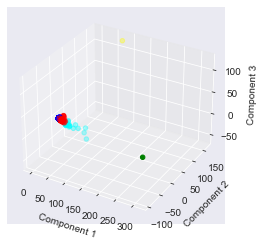

In [9]:
d.show_scatter_result()

In [10]:
dataanswer = d.show_data()
dataanswer
# 得到的dataanswer就是我们需要的数据结果

,author,content,time
0,胡守之,抛开剂量谈危害,2021-04-13 00:00:00
1,非理性消费行为,2011年311大地震发生时南方系的报道对日本极尽阿谀吹捧之能事相信日本相信这个由东西文化精...,2021-03-11 14:29:00
2,李元生,福岛是本来能救回来的结果给人硬生生拖成的切尔诺贝利是炸掉的那一瞬间一切都完了但是苏联还是尽全...,2021-04-26 00:00:00
3,上海中公教育,中公早报每日时政2月28日星期日农历正月十七1嫦娥五号奋斗者号等入选2020年度中国科学十大...,2021-02-28 09:17:00
4,芝向远大-,TF家族你是不是真喝了小的核废水了棍家一直是无论什么都是第一名而你给我们第一名的待遇了吗我们...,2021-05-15 08:08:00
...,...,...,...
8320,邱汝泉,放射性元素上是原子级别的把水加热成蒸汽难道水分子就没有氚了吗点解分解成H2难道就没有氚了吗为...,2021-04-15 00:00:00
8321,SU_ICIDER,笑死人了日本倒核废水倒你家门口你怎么不喝呢老懂懂懂哥还不是女的出来卖嘛,2021-05-10 01:35:00
8322,365-厦门大雨,日本福岛县近海海域60级地震小日本你们是造孽啊日本可以地震为借口说核废水又泄漏了加大排放量吧,2021-05-14 10:41:00
8323,返朴,日本福岛核废水排海究竟有多大影响返朴2021414,2021-04-14 00:00:00


In [11]:
ans1 = y[y['cluster'] == 0]
ans2 = y[y['cluster'] == 1]
ans3 = y[y['cluster'] == 2]
ans4 = y[y['cluster'] == 3]
ans5 = y[y['cluster'] == 4]
# ans1 = dataanswer[dataanswer['cluster'] == 0]
ans1

,author,content,time,cluster
1,非理性消费行为,2011年311大地震发生时南方系的报道对日本极尽阿谀吹捧之能事相信日本相信这个由东西文化精...,2021-03-11 14:29:00,0
3,上海中公教育,中公早报每日时政2月28日星期日农历正月十七1嫦娥五号奋斗者号等入选2020年度中国科学十大...,2021-02-28 09:17:00,0
9,布道宽窄,宽窄观察核废水直排入海或引发生态灾难日本是一个守小礼而无大义的禽兽国家O核污水入海对照苏联看...,2021-04-10 14:51:00,0
11,carlvinson金牛,核废水让兲蝗先喝杨焱鑫cz你看日本怎么对毛里求斯的就知道这个国家不要脸还有日本人自己说核废水...,2021-04-10 15:54:00,0
15,970女主播电台,福岛核事故10周年福岛核电站厂房上方发现严重污染据日本原子力规制委员会10日发布的调查报告福...,2021-03-11 10:25:00,0
...,...,...,...,...
8302,齐语06,据日媒报道东京电力公司称13日福岛附近海域发生73级地震后公司对福岛第一核电站的1074个核...,2021-03-01 14:53:00,0
8310,新知推荐官,新知推荐官果壳百万吨核污水入海多可怕日本政府基本决定将福岛核污水排入大海根据日本NHK电视台...,2021-04-10 15:45:00,0
8311,咸鱼十八摸,日本地震后福岛核电站轻微泄漏对外界没有影响日本东京电力公司14日透露在福岛东部海域13日晚发...,2021-02-16 10:37:00,0
8318,福布斯中文网,福岛核电站厂房上方发现严重污染据日本原子力规制委员会10日发布的调查报告福岛核电站2号3号机...,2021-03-11 09:38:00,0


In [12]:
ans2

,author,content,time,cluster
727,@梁山小妖,日本福岛核辐射爆表究竟有多严重世界上几乎所有人都知道美国是世界上核电站最多的国家很多人也知道...,2021-04-22 00:00:00,1


In [13]:
ans3

,author,content,time,cluster
0,胡守之,抛开剂量谈危害,2021-04-13 00:00:00,2
2,李元生,福岛是本来能救回来的结果给人硬生生拖成的切尔诺贝利是炸掉的那一瞬间一切都完了但是苏联还是尽全...,2021-04-26 00:00:00,2
4,芝向远大-,TF家族你是不是真喝了小的核废水了棍家一直是无论什么都是第一名而你给我们第一名的待遇了吗我们...,2021-05-15 08:08:00,2
5,龙皇贝纳,太想当然了nhk纪录片很多一样阴阳怪气屎味的咖啡咖啡味的屎,2021-04-28 00:00:00,2
6,章鱼宝宝爱吃草莓,日本倒核废水她装死提到中国倒支棱起来了有事搜一搜没事看一看O日本倒核废水她装死提到中国倒支棱起来了,2021-05-10 14:34:00,2
...,...,...,...,...
8319,静香视频,核污水排入海洋会有哪些影响日本政府基本决定将福岛核污水排入大海L静香视频的微博视频,2021-04-10 20:11:00,2
8320,邱汝泉,放射性元素上是原子级别的把水加热成蒸汽难道水分子就没有氚了吗点解分解成H2难道就没有氚了吗为...,2021-04-15 00:00:00,2
8321,SU_ICIDER,笑死人了日本倒核废水倒你家门口你怎么不喝呢老懂懂懂哥还不是女的出来卖嘛,2021-05-10 01:35:00,2
8323,返朴,日本福岛核废水排海究竟有多大影响返朴2021414,2021-04-14 00:00:00,2


In [14]:
ans4

,author,content,time,cluster
819,移民家园,美国支持日本福岛污水入海决定称符合全球公认核安全标准如何看待这一表态日核污水排海真的安全吗日...,2021-05-15 00:00:00,3


In [15]:
ans5

,author,content,time,cluster
433,环球奇谈,日本军事日本已不再遮掩震后处理不当决定排放核废水公然挑战全人类国际军事日本的工匠精神经常被人...,2021-04-10 19:01:00,4
1061,好难说故事,日本政府在宣布正式排核污水入海后竟然制作了放射性氚吉祥物你怎么看日本人成功的把核污染这个话题...,2021-04-13 00:00:00,4
1675,爱说话的锦鲤,日本近海惊现2只大王乌贼尸体人们忧心大地震或发生有关吗4月以来关于日本的消息还是不少主要就是...,2021-04-11 22:54:00,4
1759,凶残小龙虾,福岛第一核电站是不是继续在泄漏本文重点就是通过日本向太平洋排核废水事件分析向大家展现一下外部...,2021-04-13 00:00:00,4
2548,花猫哥哥,西式双标新高度感谢日本倒了核污水苏联拼命善后却被黑了三十年出品网易新闻导语日本政府4月13日...,2021-04-13 00:00:00,4
2993,远帆loveWANGJIE,日本不怕领土沉没127亿人退路已有2国热情敞开国门等入住想必大家也都知道目前日本民众深受核污...,2021-02-26 01:55:00,4
3197,Forever-we-young,日本政府基本决定将福岛核污水排入大海据日本时事通讯社报道日本政府4月9日基本决定将福岛第一核...,2021-04-09 13:45:00,4
3508,规矩与良知律师,从排放之日起日本核污水57天将污染半个太平洋对我国有何影响据日本媒体报道日本政府基本决定将福...,2021-04-11 20:39:00,4
3611,風島文,为什么大多数核电站都在海边是为了最坏的情况发生的话往海里排污染吗1欧美国家今年3月在中美展开...,2021-04-15 00:00:00,4
3756,我到不了,如果日本核废水排入海里会对中国沿海城市和内陆城市格局造成什么影响这个世界已经分的很清楚了就像...,2021-04-13 00:00:00,4


In [20]:
y=d.cluster_KMeans(3)
y
# d.show_scatter_result()

ans1 = y[y['cluster'] == 0]
ans2 = y[y['cluster'] == 1]
ans3 = y[y['cluster'] == 2]

# ans1 = dataanswer[dataanswer['cluster'] == 0]
ans1

,author,content,time,cluster
0,胡守之,抛开剂量谈危害,2021-04-13 00:00:00,0
1,非理性消费行为,2011年311大地震发生时南方系的报道对日本极尽阿谀吹捧之能事相信日本相信这个由东西文化精...,2021-03-11 14:29:00,0
2,李元生,福岛是本来能救回来的结果给人硬生生拖成的切尔诺贝利是炸掉的那一瞬间一切都完了但是苏联还是尽全...,2021-04-26 00:00:00,0
3,上海中公教育,中公早报每日时政2月28日星期日农历正月十七1嫦娥五号奋斗者号等入选2020年度中国科学十大...,2021-02-28 09:17:00,0
4,芝向远大-,TF家族你是不是真喝了小的核废水了棍家一直是无论什么都是第一名而你给我们第一名的待遇了吗我们...,2021-05-15 08:08:00,0
...,...,...,...,...
8320,邱汝泉,放射性元素上是原子级别的把水加热成蒸汽难道水分子就没有氚了吗点解分解成H2难道就没有氚了吗为...,2021-04-15 00:00:00,0
8321,SU_ICIDER,笑死人了日本倒核废水倒你家门口你怎么不喝呢老懂懂懂哥还不是女的出来卖嘛,2021-05-10 01:35:00,0
8322,365-厦门大雨,日本福岛县近海海域60级地震小日本你们是造孽啊日本可以地震为借口说核废水又泄漏了加大排放量吧,2021-05-14 10:41:00,0
8323,返朴,日本福岛核废水排海究竟有多大影响返朴2021414,2021-04-14 00:00:00,0


In [62]:
data = pd.read_csv("results/random-nuclear/Res-Dat/timesorted-2021.csv")
data.head()

,author,content,time
0,科技扒一扒,新闻看点前段时间日本内阁对外宣称由于福岛核电站存储的污水无处存他们召开内阁会议决定将这些核废...,2021-01-01 12:59:00
1,马关ty1895,男子持刀捅人被抓后仍大喊要杀人村民他是我们村支书任重而道远我爱你中国我国单身成年人口24亿人...,2021-01-02 10:15:00
2,愤怒的啄木鸟1996,鸟哥点评让中国核公知去给福岛民众科普一下让日本人民放心2011年发生的311东日本大地震及其...,2021-01-02 15:23:00
3,马关ty1895,致敬每一位不平凡的中国人我爱你中国我和我的祖国实干兴邦我们都是奋斗者只争朝夕不负韶华幸福都是...,2021-01-02 16:43:00
4,重修课本再来归,日本将核污水倒进海洋以后海产品慎吃海盐也不例外2扬州,2021-01-02 19:01:00


In [63]:
import wordCleaner
wd = wordCleaner.WordCleaner(data)
s = wd.stop_words_data("results/random-nuclear")
s

分词切割成功！


,content,author,time
0,新闻/n 看点/n 前段时间/n 日本/ns 内阁/n 对外/s 宣称/v 由于/c 福岛/...,科技扒一扒,2021-01-01 12:59:00
1,男子/n 持刀/n 捅/v 人/n 被/p 抓/v 后/f 仍/d 大喊/v 要/v 杀人/...,马关ty1895,2021-01-02 10:15:00
2,鸟哥/n 点评/v 让/v 中国/ns 核公/n 知去/v 给/p 福岛/ns 民众/n 科...,愤怒的啄木鸟1996,2021-01-02 15:23:00
3,致敬/v 每/zg 一位/m 不/d 平凡/a 的/uj 中国/ns 人/n 我爱你/l 中...,马关ty1895,2021-01-02 16:43:00
4,日本/ns 将/d 核/v 污水/n 倒/v 进/v 海洋/ns 以后/f 海产品/n 慎/...,重修课本再来归,2021-01-02 19:01:00
5,估计/v 喝/vg 了/ul 核/n 废水/n,kunoichicoco,2021-01-02 19:56:00
6,在/p 插画/n 集中/v 环形/n 物语/n 是/v 西蒙丝/nr 塔伦/ns 海格/n ...,刘一菲LeesonPace,2021-01-03 00:27:00
7,不可思议/i,慕庚啲跳跳Kiki,2021-01-03 01:59:00
8,甜蜜/a 家园/n 大家/n 所/c 担心/v 的/uj 正/a 一步/m 一步/m 成为/...,生如夏花LXM,2021-01-03 03:57:00
9,25/m 岁/m 演员/n 孙/nr 侨/ng 潞/g 去世/t 心肌梗死/n 为何/r 缠...,马关ty1895,2021-01-03 18:40:00


In [64]:
data=s

In [65]:
import jieba
def tokenizer(sentense):
    words = []
    cut = jieba.cut(sentense)
    for word in cut:
        words.append(word)
    return words

from sklearn.feature_extraction.text import CountVectorizer
stopwords = [] #去停用词列表
for stopword in open('stopwords/baidu_stopwords.txt', 'r', encoding='utf-8'):
    stopwords.append(stopword.strip())
count = CountVectorizer(tokenizer=tokenizer, stop_words=list(stopwords))
countvector = count.fit_transform(data['content']).toarray()
countvector

/home/ma-user/anaconda3/envs/XGBoost-Sklearn/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'a', 'ain', 'aren', 'c', 'couldn', 'd', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'i', 'isn', 'll', 'm', 'mon', 's', 'shouldn', 't', 've', 'wasn', 'weren', 'won', 'wouldn', '下', '不', '为什', '什', '今', '使', '先', '却', '只', '唷', '啪', '喔', '天', '好', '後', '最', '漫', '然', '特', '特别', '见', '设', '说', '达', '面', '麽', '－'] not in stop_words.
  sorted(inconsistent))


array([[  86,   87,    0, ...,    0,    0,    0],
       [ 173,  174,    0, ...,    0,    0,    0],
       [ 248,  249,    0, ...,    0,    0,    0],
       ...,
       [ 375,  376,    0, ...,    0,    0,    0],
       [   6,    7,    0, ...,    0,    0,    0],
       [7823, 7824,    0, ...,    0,    0,    0]], dtype=int64)

In [66]:
from nlp_dimensioner import PCA
pca_data = PCA.PCAController(data,countvector)
X_pca_frame = pca_data.pca_3()
X_pca_frame

,pca_1,pca_2,pca_3
0,69.607942,-0.607657,1.205506
1,196.965549,-2.103621,11.876056
2,304.515111,-1.819443,6.835775
3,122.735148,0.557616,1.772730
4,-32.470974,0.817364,-1.113570
5,-49.954165,0.346951,0.866096
6,277.497337,-3.515720,16.831855
7,-55.922350,0.569618,0.082939
8,61.590528,-1.544997,-0.013532
9,44.043978,1.300379,6.524347


In [67]:
X_pca_frame.to_csv("PCA-03.csv", index=False)


In [68]:
X_pca_frame = pd.read_csv("PCA-03.csv")
X_pca_frame.head()

,pca_1,pca_2,pca_3
0,69.607942,-0.607657,1.205506
1,196.965549,-2.103621,11.876056
2,304.515111,-1.819443,6.835775
3,122.735148,0.557616,1.772730
4,-32.470974,0.817364,-1.113570


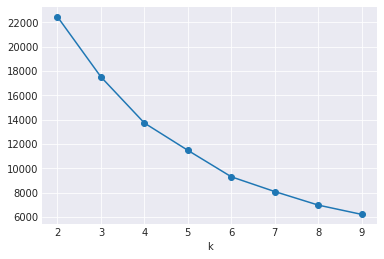

In [69]:
from dataclustertools import kmeanscluster
d = kmeanscluster.KMeansController(data, X_pca_frame)
d.elbow_cluster_comment('results/random-nuclear/Res-Picture/', "1")

session.upload_data(bucket_path=OBS_BASE_PATH + '/askiksa/SocialMidea/', path='results/random-nuclear/Res-Picture/1-elbow-KMEANS-cluster.png')

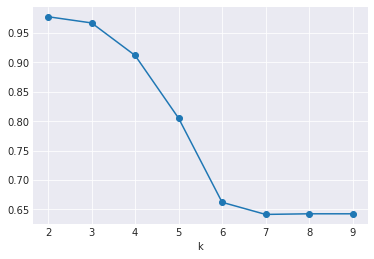

In [70]:
d.silhouette_cluster_comment('results/random-nuclear/Res-Picture/', "1")

In [95]:
y=d.cluster_KMeans(6)
y

,content,author,time,cluster
0,新闻/n 看点/n 前段时间/n 日本/ns 内阁/n 对外/s 宣称/v 由于/c 福岛/...,科技扒一扒,2021-01-01 12:59:00,3
1,男子/n 持刀/n 捅/v 人/n 被/p 抓/v 后/f 仍/d 大喊/v 要/v 杀人/...,马关ty1895,2021-01-02 10:15:00,3
2,鸟哥/n 点评/v 让/v 中国/ns 核公/n 知去/v 给/p 福岛/ns 民众/n 科...,愤怒的啄木鸟1996,2021-01-02 15:23:00,2
3,致敬/v 每/zg 一位/m 不/d 平凡/a 的/uj 中国/ns 人/n 我爱你/l 中...,马关ty1895,2021-01-02 16:43:00,3
4,日本/ns 将/d 核/v 污水/n 倒/v 进/v 海洋/ns 以后/f 海产品/n 慎/...,重修课本再来归,2021-01-02 19:01:00,0
5,估计/v 喝/vg 了/ul 核/n 废水/n,kunoichicoco,2021-01-02 19:56:00,0
6,在/p 插画/n 集中/v 环形/n 物语/n 是/v 西蒙丝/nr 塔伦/ns 海格/n ...,刘一菲LeesonPace,2021-01-03 00:27:00,3
7,不可思议/i,慕庚啲跳跳Kiki,2021-01-03 01:59:00,0
8,甜蜜/a 家园/n 大家/n 所/c 担心/v 的/uj 正/a 一步/m 一步/m 成为/...,生如夏花LXM,2021-01-03 03:57:00,3
9,25/m 岁/m 演员/n 孙/nr 侨/ng 潞/g 去世/t 心肌梗死/n 为何/r 缠...,马关ty1895,2021-01-03 18:40:00,3


In [96]:
d.show_scatter_result()

AttributeError: 'DataFrame' object has no attribute 'map'

In [97]:
ans1 = y[y['cluster'] == 0]
ans2 = y[y['cluster'] == 1]
ans3 = y[y['cluster'] == 2]
ans4 = y[y['cluster'] == 3]
ans5 = y[y['cluster'] == 4]
ans6 = y[y['cluster'] == 5]


print(ans1.shape)
ans1.head()

(33638, 4)


,content,author,time,cluster
4,日本/ns 将/d 核/v 污水/n 倒/v 进/v 海洋/ns 以后/f 海产品/n 慎/...,重修课本再来归,2021-01-02 19:01:00,0
5,估计/v 喝/vg 了/ul 核/n 废水/n,kunoichicoco,2021-01-02 19:56:00,0
7,不可思议/i,慕庚啲跳跳Kiki,2021-01-03 01:59:00,0
10,日本/ns 考虑/v 再次/d 宣布/v 紧急状态/l 核/n 废水/n 排/v 的/uj ...,真性情的疯子,2021-01-03 19:46:00,0
11,日本/ns 考虑/v 再次/d 宣布/v 紧急状态/l 做/v 个人/n 吧/y 核/n 废...,是福宝啊,2021-01-03 20:43:00,0


In [107]:
print(ans2.shape)
ans2.head()

(17, 4)


,content,author,time,cluster
58,酒泉/n 倾力/n 建设/vn 以/p 马鬃山/ns 等/u 地区/n 为主/v 的/uj ...,酒泉日报,2021-01-08 12:51:00,1
10479,福岛/ns 第一/m 核电站/n 是不是/l 继续/v 在/p 泄漏/v 本文/r 重点/n...,凶残小龙虾,2021-04-13 00:00:00,1
10645,科学/n 上/f 的/uj 弥天大谎/i 法律/n 上/f 的/uj 赤裸/z 私心/n 再...,空一格,2021-04-13 00:00:00,1
10785,如何/r 看待/v 日本/ns 考虑/v 让/v 韩/nr 参与/v 监督/vn 核污染/n...,武国鉴,2021-04-13 00:00:00,1
17953,从/p 对/p 核/n 污水/n 的/uj 态度/n 到/v 面对/v 肿瘤/n 的/uj ...,三爷,2021-04-14 00:00:00,1


In [100]:
print(ans3.shape)
ans3

(410, 4)


,content,author,time,cluster
2,鸟哥/n 点评/v 让/v 中国/ns 核公/n 知去/v 给/p 福岛/ns 民众/n 科...,愤怒的啄木鸟1996,2021-01-02 15:23:00,2
19,日本/ns 民调/n 显示/v 过半/t 受访/v 民众/n 反对/d 将/d 福岛/ns ...,正观新闻,2021-01-04 11:27:00,2
37,军事/n 新闻/n 日/m 媒/n 过半/t 日本/ns 人/n 反对/d 排放/v 福岛/...,环球奇谈,2021-01-05 09:26:00,2
44,日本/ns 55/m 的/uj 民众/n 反对/d 将/d 福岛/ns 核/n 污水/n 排...,韩民族日报中文网,2021-01-05 15:27:00,2
57,来稿/v 日本/ns 将/d 确定/v 福岛/ns 核/n 污水/n 的/uj 排放/v 计...,韩民族日报中文网,2021-01-08 10:26:00,2
189,海外/s 网/n 1/m 月/m 13/m 日电/j 日本/ns 福岛/ns 第一/m 核电...,愤怒的啄木鸟1996,2021-01-13 16:16:00,2
279,乌克兰/nr 的/uj 核技术/n 如/v 核电/n 核污染/n 修复/v 是不是/l 处于...,园田田除甲醛老冯,2021-01-19 00:00:00,2
282,止水/v 螺杆/n 的/uj 种类/n 及/c 功能/n 止水/v 螺杆/n 通常/d 用/...,河北万鑫紧固件,2021-01-19 15:31:00,2
292,美国/ns 德/ns 特里/nrt 克堡/nrt 生物/n 实验室/n 一/m 晚上/t 真...,虾虾是肖兔子的,2021-01-20 09:09:00,2
306,我/r 的/uj 前提/n 我/r 憎恶/v 日本/ns 我/r 希望/v 日本/ns 人/...,PoorBDr,2021-01-21 21:50:00,2


In [102]:
print(ans4.shape)
ans4.head()

(7463, 4)


,content,author,time,cluster
0,新闻/n 看点/n 前段时间/n 日本/ns 内阁/n 对外/s 宣称/v 由于/c 福岛/...,科技扒一扒,2021-01-01 12:59:00,3
1,男子/n 持刀/n 捅/v 人/n 被/p 抓/v 后/f 仍/d 大喊/v 要/v 杀人/...,马关ty1895,2021-01-02 10:15:00,3
3,致敬/v 每/zg 一位/m 不/d 平凡/a 的/uj 中国/ns 人/n 我爱你/l 中...,马关ty1895,2021-01-02 16:43:00,3
6,在/p 插画/n 集中/v 环形/n 物语/n 是/v 西蒙丝/nr 塔伦/ns 海格/n ...,刘一菲LeesonPace,2021-01-03 00:27:00,3
8,甜蜜/a 家园/n 大家/n 所/c 担心/v 的/uj 正/a 一步/m 一步/m 成为/...,生如夏花LXM,2021-01-03 03:57:00,3


In [103]:
print(ans5.shape)
ans5.head()

(2, 4)


,content,author,time,cluster
28134,日本/ns 福岛/ns 核辐射/n 爆表/v 究竟/d 有/v 多/m 严重/a 世界/n ...,@梁山小妖,2021-04-22 00:00:00,4
41605,精于/v 垃圾/n 分类/n 的/uj 日本鬼子/n 要/v 把/p 核/n 污水/n 倒/...,Fanny伊米妈,2021-05-30 00:00:00,4


In [105]:
print(ans6.shape)
ans6

(76, 4)


,content,author,time,cluster
423,还/d 没完/v 日本/ns 还要/c 造更/v 多/m 更/d 多/m 核电站/n 地球/...,chenghao96,2021-02-03 00:00:00,5
1399,地球/n 人/n 无法/n 阻止/v 日本/ns 倾倒/v 核/n 污水/n 人类/n 在/...,翼启学,2021-02-25 00:00:00,5
3236,十三/m 五/m 以来/f 云南/ns 举/v 全省/n 之/u 力/n 打/v 好/a 污...,云南信息报,2021-03-30 09:28:00,5
4337,日本/ns 倾倒/v 核/n 废水/n 为何/r 没有/v 引起/v 国际/n 社会/n 的...,一颗青木,2021-04-10 00:00:00,5
6388,核/n 污水/n 入海/ns 号称/v 最守/a 秩序/n 的/uj 国家/n 要/v 给/...,逸竹仙,2021-04-10 19:51:00,5
6526,0410/m 炒股/v 养家/n 爆/v 两个/m 重磅/n 消息/n 昨天/t 市场/n ...,炒股养家实战,2021-04-10 21:00:00,5
7100,为什么/r 日本/ns 排放/v 核/n 污水/n 美国/ns 不/d 反对/d 日本/ns...,阿尔法说,2021-04-11 00:00:00,5
7615,0411/m 复盘/v 重点/n 关注/v 下周/t 是否/v 变盘/v 今天/t 是/v ...,谈股明菜爱喂熊,2021-04-11 20:56:00,5
7986,日本/ns 近海/f 惊现/v 2/m 只/c 大王/nrt 乌贼/n 尸体/n 人们/n ...,爱说话的锦鲤,2021-04-11 22:54:00,5
10703,倾倒/v 福岛/ns 核/n 废水/n 2011/m 年/m 福岛/ns 第一/m 核电站/...,一路往北,2021-04-13 00:00:00,5


In [83]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 24.7MB/s ta 0:00:01
You are using pip version 9.0.1, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


{'日本': 1.0, '废水': 0.48677880080481295, '福岛': 0.3711742106608802, '美国': 0.23749045566206944, '中国': 0.17536526965732338, '核污染': 0.1637007619733873, '核电站': 0.1629861858622272, '入海': 0.15750414913496624, '世界': 0.10662348076493369, '海洋': 0.10459807721880755, '国家': 0.09769683742492288, '问题': 0.09446936652807911, '太平洋': 0.09287404475153835, '污水': 0.084759350278481, '国际': 0.07345349874746068, '东京': 0.07290461239907887, '全球': 0.06881953754323387, '人类': 0.0686801744795952, '视频': 0.06561132480096105, '链接': 0.06533500937080522, '全世界': 0.06519883294964439, '性质': 0.061759463984954736, '韩国': 0.061262635632014395, '大海': 0.05824853830074052, '政治': 0.05664743006502551, '电力公司': 0.05601900842389723, '变异': 0.05047034448807504, '建议': 0.048692576522934475, '饮用水': 0.04798801757231407, '人民': 0.046357220499684076, '媒体': 0.04629152385009448, '事件': 0.045256287416778215, '新冠': 0.04339419824374979, '印度': 0.04267419919732109, '新闻': 0.04230760637619998, '垃圾': 0.0422139351622107, '工具': 0.04077424204218307, '网页': 0.038

{'日本': 1.0,
 '废水': 0.48677880080481295,
 '福岛': 0.3711742106608802,
 '美国': 0.23749045566206944,
 '中国': 0.17536526965732338,
 '核污染': 0.1637007619733873,
 '核电站': 0.1629861858622272,
 '入海': 0.15750414913496624,
 '世界': 0.10662348076493369,
 '海洋': 0.10459807721880755,
 '国家': 0.09769683742492288,
 '问题': 0.09446936652807911,
 '太平洋': 0.09287404475153835,
 '污水': 0.084759350278481,
 '国际': 0.07345349874746068,
 '东京': 0.07290461239907887,
 '全球': 0.06881953754323387,
 '人类': 0.0686801744795952,
 '视频': 0.06561132480096105,
 '链接': 0.06533500937080522,
 '全世界': 0.06519883294964439,
 '性质': 0.061759463984954736,
 '韩国': 0.061262635632014395,
 '大海': 0.05824853830074052,
 '政治': 0.05664743006502551,
 '电力公司': 0.05601900842389723,
 '变异': 0.05047034448807504,
 '建议': 0.048692576522934475,
 '饮用水': 0.04798801757231407,
 '人民': 0.046357220499684076,
 '媒体': 0.04629152385009448,
 '事件': 0.045256287416778215,
 '新冠': 0.04339419824374979,
 '印度': 0.04267419919732109,
 '新闻': 0.04230760637619998,
 '垃圾': 0.0422139351622107,
 '工

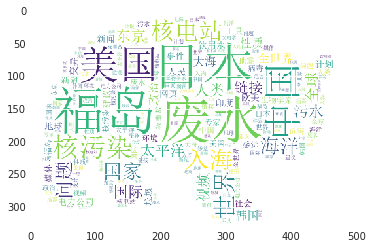

In [106]:

import dataVision 
a = dataVision.DataVisitor(ans1)
a.show_word_cloud('material/simsun.ttc', 'material/panda.jpg','results/random-nuclear/Jan_word_frequency.txt', 'results/random-nuclear/Jan-cloud.png')

{'日本': 1.0, '福岛': 0.6669739775989769, '核电站': 0.46413108342668313, '美国': 0.29284370408670807, '废水': 0.26220342253170614, '中国': 0.2302030896634919, '放射性': 0.2165522838644241, '海洋': 0.19912650679169108, '经济': 0.19908689293411233, '问题': 0.18804626363207821, '国家': 0.18569409132426049, '东京': 0.17166239342289577, '国际': 0.1675351853630038, '反应堆': 0.16187126691261547, '渔业': 0.15259046020881464, '人类': 0.13943909240605598, '全球': 0.13405372859705897, '核事故': 0.1329880019823248, '核电': 0.12795759519732564, '产生': 0.12532272878613696, '太平洋': 0.12513912767488422, '污水': 0.1212081451651683, '社会': 0.11491381318905834, '环境': 0.11428626039291413, '标准': 0.10948853158368543, '来源': 0.10904653852726642, '技术': 0.10229098812502899, '电力公司': 0.0998062482044267, '入海': 0.09771423032056033, '事件': 0.09471255510247843, '责任': 0.09332336414415764, '海鲜': 0.09201433621601329, '事故': 0.08984611436431987, '苏联': 0.08978396349876795, '浓度': 0.08932903008255247, '产业': 0.08893967385110312, '放射性物质': 0.08582126701693352, '世界': 0.08433

{'日本': 1.0,
 '福岛': 0.6669739775989769,
 '核电站': 0.46413108342668313,
 '美国': 0.29284370408670807,
 '废水': 0.26220342253170614,
 '中国': 0.2302030896634919,
 '放射性': 0.2165522838644241,
 '海洋': 0.19912650679169108,
 '经济': 0.19908689293411233,
 '问题': 0.18804626363207821,
 '国家': 0.18569409132426049,
 '东京': 0.17166239342289577,
 '国际': 0.1675351853630038,
 '反应堆': 0.16187126691261547,
 '渔业': 0.15259046020881464,
 '人类': 0.13943909240605598,
 '全球': 0.13405372859705897,
 '核事故': 0.1329880019823248,
 '核电': 0.12795759519732564,
 '产生': 0.12532272878613696,
 '太平洋': 0.12513912767488422,
 '污水': 0.1212081451651683,
 '社会': 0.11491381318905834,
 '环境': 0.11428626039291413,
 '标准': 0.10948853158368543,
 '来源': 0.10904653852726642,
 '技术': 0.10229098812502899,
 '电力公司': 0.0998062482044267,
 '入海': 0.09771423032056033,
 '事件': 0.09471255510247843,
 '责任': 0.09332336414415764,
 '海鲜': 0.09201433621601329,
 '事故': 0.08984611436431987,
 '苏联': 0.08978396349876795,
 '浓度': 0.08932903008255247,
 '产业': 0.08893967385110312,
 '放射性物质'

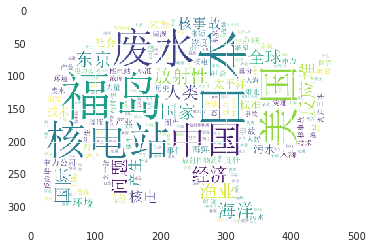

In [94]:

import dataVision 
a = dataVision.DataVisitor(ans2)
a.show_word_cloud('material/simsun.ttc', 'material/panda.jpg','results/random-nuclear/Jan_word_frequency.txt', 'results/random-nuclear/4-cloud.png')

In [89]:
session.upload_data(bucket_path=OBS_BASE_PATH + '/SocialMidea/', path='results/random-nuclear/4-cloud.png')

Successfully upload file results/random-nuclear/4-cloud.png to OBS askiksa/SocialMidea


In [88]:

session.upload_data(bucket_path=OBS_BASE_PATH + '/SocialMidea/', path='results/random-nuclear/Jan-cloud.png')

Successfully upload file results/random-nuclear/Jan-cloud.png to OBS askiksa/SocialMidea
